In [1]:
# 대표적인 이산형 확률분포

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

%precision 3
%matplotlib inline

In [21]:
# 이 리스트는 그래프의 선 스타일을 정의하기 위한 것으로, 여러 그래프를 구분할 때 사용됩니다.
linestyles = ['-', '--', ':']

# 기대값을 계산하는 함수
# X: 확률변수의 값의 집합과 확률질량함수를 포함하는 튜플
# g: 확률변수 X에 적용할 함수 (기본값은 항등 함수)
def E(X, g=lambda x: x):
    # x_set은 확률변수 X의 가능한 모든 값의 집합
    # f는 각 값 x_k에 대한 확률질량함수를 나타냄
    x_set, f = X
    # 기대값은 각 값 x_k에 함수 g를 적용하고 확률 f(x_k)로 가중하여 모두 합한 값
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])

# 분산을 계산하는 함수
# X: 확률변수의 값의 집합과 확률질량함수를 포함하는 튜플
# g: 확률변수 X에 적용할 함수 (기본값은 항등 함수)
def V(X, g=lambda x: x):
    x_set, f = X
    # 우선 주어진 함수 g에 대해 기대값을 계산
    mean = E(X, g)
    # 분산은 각 값에 대해 (g(x_k) - 기대값)^2을 계산하고 이를 확률로 가중하여 합한 값
    return np.sum([(g(x_k) - mean)**2 * f(x_k) for x_k in x_set])

# 확률분포가 유효한지 검사하는 함수
# X: 확률변수의 값의 집합과 확률질량함수를 포함하는 튜플
def check_prob(X):
    x_set, f = X
    # 각 x_k에 대한 확률을 계산하여 배열로 만듦
    prob = np.array([f(x_k) for x_k in x_set])
    # 확률 값이 모두 0 이상인지 확인
    assert np.all(prob >= 0), 'minus probability'
    # 확률의 총합이 1에 가까운지 확인 (부동소수점 연산 때문에 np.round를 사용)
    prob_sum = np.round(np.sum(prob), 6)
    assert prob_sum == 1, f'sum of probability{prob_sum}'
    # 기대값과 분산을 출력
    print(f'expected value {E(X):.4}')
    print(f'variance {V(X):.4}')

# 확률변수의 확률분포를 막대 그래프로 시각화하는 함수
# X: 확률변수의 값의 집합과 확률질량함수를 포함하는 튜플
def plot_prob(X):
    x_set, f = X
    # 확률변수의 각 값에 대한 확률을 계산
    prob = np.array([f(x_k) for x_k in x_set])

    # 그래프의 크기를 설정하고 서브플롯을 추가
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)
    # 확률변수의 값에 대해 막대 그래프를 그림
    ax.bar(x_set, prob, label='prob')
    # 기대값에 세로선을 추가하여 기대값을 시각적으로 나타냄
    ax.vlines(E(X), 0, 1, label='mean')
    # x축의 눈금을 설정
    ax.set_xticks(np.append

## 6.1 베르누이 분포

In [4]:
# 베르누이 확률분포를 정의하는 함수
# p: 성공 확률을 나타내는 파라미터
def Bern(p):
    # 베르누이 확률변수가 취할 수 있는 값의 집합, 0 (실패) 또는 1 (성공)
    x_set = np.array([0, 1])

    # 확률질량함수(probability mass function, PMF)를 정의하는 내부 함수
    def f(x):
        # x 값이 x_set 즉, 0 또는 1 중 하나일 경우
        if x in x_set:
            # x가 1일 때는 확률 p, x가 0일 때는 확률 (1-p)를 반환합니다.
            # ** 연산자는 거듭제곱을 나타내며, x가 1이면 p^1 * (1-p)^(1-1) = p,
            # x가 0이면 p^0 * (1-p)^(1-0) = (1-p)가 됩니다.
            return p ** x * (1-p) ** (1-x)
        else:
            # x가 0 또는 1이 아닐 경우 확률은 0입니다.
            return 0

    # 확률변수의 값의 집합과 확률질량함수를 튜플로 반환합니다.
    # 이 튜플은 위에서 설명한 E, V, check_prob, plot_prob 함수에 사용될 수 있습니다.
    return x_set, f

In [5]:
# 'p'는 성공 확률을 나타내는 변수로, 여기서는 0.3 (30%)으로 설정됩니다.
p = 0.3

# 'X'는 위에서 정의한 'Bern' 함수를 사용하여 생성된 베르누이 확률변수를 나타냅니다.
# 'Bern(p)'는 성공 확률이 'p'인 베르누이 확률분포를 반환합니다.
# 이 때, 'X'는 베르누이 확률변수의 값 집합과 해당 값에 대한 확률질량함수를 포함하는 튜플입니다.
X = Bern(p)

# 결과적으로 'X'는 다음과 같은 구성요소를 가집니다:
# x_set = np.array([0, 1]), 여기서 0은 실패를 나타내고 1은 성공을 나타냅니다.
# 확률질량함수 'f'는 x_set의 각 값에 대해 정의된 확률을 반환합니다.
# 즉, f(0) = (1-p)^1 = 0.7은 실패 확률을,
# f(1) = p^1 = 0.3은 성공 확률을 의미합니다.

In [6]:
# 'check_prob' 함수는 주어진 확률변수 X에 대한 확률분포의 유효성을 검사하고
# 기대값(expected value)과 분산(variance)을 계산하여 출력하는 함수입니다.

# 함수를 실행하기 전에, X는 Bern(p)를 통해 생성된 베르누이 분포의 튜플입니다.
# 여기서 'p = 0.3'로 설정되어 있으며, 이는 성공 확률을 의미합니다.

# 이 코드 라인은 'check_prob' 함수를 호출하고, X를 인자로 전달합니다.
# check_prob(X)의 실행은 다음 단계들로 이루어져 있습니다:

# 1. X 내의 x_set(확률변수의 가능한 값)과 f(확률질량함수)를 사용하여
#    각 값의 확률을 계산합니다.

# 2. 계산된 확률이 모두 0 이상인지 확인합니다. (assert np.all(prob >= 0))
#    이 조건이 실패하면 'minus probability' 오류 메시지가 표시됩니다.

# 3. 확률값들의 총합이 1에 매우 가까운지 (실질적으로 1과 동일한지) 확인합니다.
#    np.round 함수는 부동소수점 연산에서 나타날 수 있는 미세한 오차를 보정합니다.
#    총합이 1이 아니면, 'sum of probability'와 함께 실제 합계가 출력됩니다.

# 4. 기대값과 분산을 계산하고 출력합니다.
#    기대값은 각 값에 대해 그 값과 그 값이 나타날 확률을 곱한 것의 총합입니다.
#    분산은 각 값에서 기대값을 뺀 뒤 제곱한 값을 확률로 가중한 평균입니다.

# 'check_prob' 함수의 실행 결과로, 우리는 베르누이 확률변수 X의
# 기대값과 분산을 알 수 있습니다. 이 경우 X의 기대값은 성공 확률인 p에 해당하며,
# 분산은 p*(1-p)가 됩니다.
check_prob(X)

expected value 0.3
variance 0.21


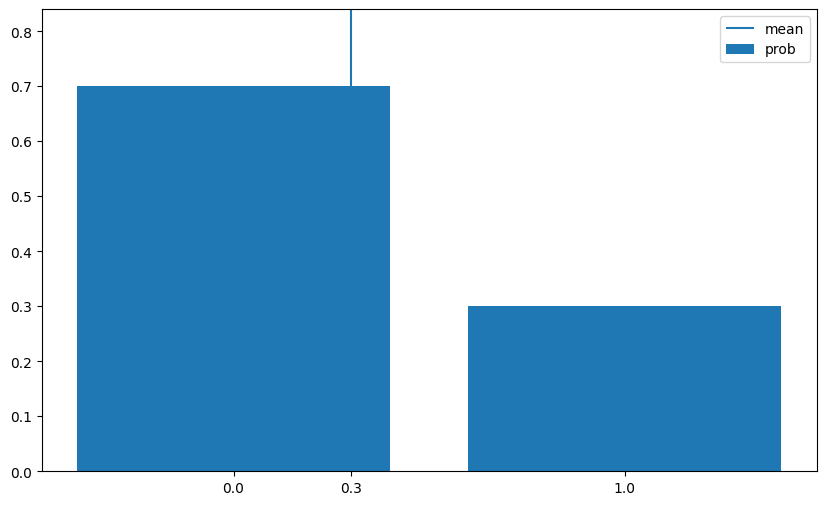

In [7]:
plot_prob(X)

In [8]:
# stats 모듈에서 bernoulli 클래스를 사용하여 베르누이 확률분포 객체를 생성합니다.
# 'rv'는 이제 p=0.3인 베르누이 분포를 나타내는 랜덤변수(random variable) 객체입니다.

# 'p'는 성공 확률을 나타내며, 이전에 0.3으로 설정되었습니다.
p = 0.3

# stats.bernoulli(p) 호출은 scipy.stats 라이브러리 내의 bernoulli 클래스를 사용하여
# 확률 'p'에 대한 베르누이 확률분포를 나타내는 객체를 생성합니다.
# 이 객체는 베르누이 분포에 대한 다양한 확률 계산 메서드를 제공합니다.
rv = stats.bernoulli(p)

# 생성된 'rv' 객체를 사용하여 다음과 같은 작업을 수행할 수 있습니다:
# - pmf(k): 확률 질량 함수(Probability Mass Function)를 사용하여, 가능한 베르누이 시행 결과 k에 대한 확률을 계산합니다.
# - cdf(k): 누적 분포 함수(Cumulative Distribution Function)를 사용하여, k 이하의 값을 얻을 확률을 계산합니다.
# - mean(): 분포의 기대값(평균)을 반환합니다.
# - var(): 분포의 분산을 반환합니다.
# - rvs(size): 주어진 크기의 난수 샘플을 생성합니다.

# 이 'rv' 객체는 위에서 정의한 수작업 계산 함수(check_prob 등)와 비교하여
# 통계 계산을 더 편리하고 효율적으로 할 수 있게 해줍니다.

In [9]:
rv.pmf(0), rv.pmf(1)

# 'rv' 객체는 p=0.3인 베르누이 분포의 랜덤변수를 나타냅니다.
# 이 코드는 베르누이 분포의 확률 질량 함수(Probability Mass Function, PMF)를 사용하여
# 가능한 두 결과 0과 1의 확률을 계산합니다.

# rv.pmf(0)은 '실패' 결과(즉, 베르누이 시행에서 0을 얻는 결과)의 확률을 반환합니다.
# 이 확률은 '1-p'로 계산되며, p가 0.3이므로 이 확률은 0.7이 됩니다.
# pmf_zero = rv.pmf(0)

# rv.pmf(1)은 '성공' 결과(즉, 베르누이 시행에서 1을 얻는 결과)의 확률을 반환합니다.
# 이 확률은 'p'로 계산되며, p가 0.3이므로 이 확률은 0.3이 됩니다.
# pmf_one = rv.pmf(1)

# 결과적으로 rv.pmf(0)과 rv.pmf(1)은 베르누이 분포에서 0과 1을 각각 얻을 확률을 계산합니다.
# 이 두 확률의 합은 1이 됩니다. 왜냐하면 베르누이 시행에서는 오직 두 가지 결과만 가능하기 때문입니다.
# 이는 베르누이 분포의 정의에 부합합니다.
# print(rv.pmf(0), rv.pmf(1))

(0.700, 0.300)

In [10]:
rv.pmf([0, 1])

# 'rv' 객체는 p=0.3으로 정의된 베르누이 분포의 랜덤변수입니다.
# rv.pmf 함수는 확률 질량 함수(Probability Mass Function, PMF)를 계산하는 메서드입니다.

# rv.pmf([0, 1]) 호출은 베르누이 분포에 대한 PMF를 이용하여
# 결과값이 0과 1일 때의 확률을 배열 형태로 동시에 계산합니다.
# 이렇게 하면 베르누이 분포의 전체 확률분포를 한 번에 얻을 수 있습니다.

# 구체적으로, rv.pmf([0, 1])는 다음과 같은 결과를 반환합니다:
# - 배열의 첫 번째 요소는 0이 나올 확률, 즉 '실패'의 확률을 나타냅니다. 이 값은 1-p로 계산되며, 여기서는 0.7(1-0.3)입니다.
# - 배열의 두 번째 요소는 1이 나올 확률, 즉 '성공'의 확률을 나타냅니다. 이 값은 p로 계산되며, 여기서는 0.3입니다.

# 결과적으로 이 호출은 베르누이 분포의 전체 확률 분포를 나타내는 [0.7, 0.3]이라는 배열을 반환합니다.
# 이 배열은 베르누이 시행의 모든 가능한 결과에 대한 확률을 포함하고 있으며, 이 두 확률의 합은 항상 1입니다.
# probabilities = rv.pmf([0, 1])
# print(probabilities)

array([0.7, 0.3])

In [11]:
rv.cdf([0, 1])

# 'rv' 객체는 p=0.3인 베르누이 분포를 나타내는 scipy.stats의 랜덤변수 객체입니다.
# rv.cdf 함수는 누적 분포 함수(Cumulative Distribution Function, CDF)를 계산하는 메서드입니다.

# rv.cdf([0, 1]) 호출은 베르누이 분포의 CDF를 이용하여
# 결과값이 0 이하와 1 이하일 때까지의 누적 확률을 배열 형태로 동시에 계산합니다.
# CDF는 주어진 값까지의 확률의 누적을 나타냅니다.

# 구체적으로, rv.cdf([0, 1])는 다음과 같은 결과를 반환합니다:
# - 배열의 첫 번째 요소는 0 이하의 값이 나올 누적 확률입니다. 베르누이 분포에서 0 이하의 값은 오직 0뿐이므로,
#   이 확률은 rv.pmf(0)과 같고, 따라서 0.7(실패 확률)이 됩니다.
# - 배열의 두 번째 요소는 1 이하의 값이 나올 누적 확률입니다. 베르누이 시행에서 가능한 값은 0과 1뿐이므로,
#   이 확률은 모든 확률의 합이 되어야 하며, 따라서 1.0이 됩니다.

# 결과적으로 이 호출은 [0.7, 1.0]이라는 배열을 반환합니다.
# 첫 번째 값은 0까지의 누적 확률을, 두 번째 값은 전체 확률 분포를 완전히 덮는 1까지의 누적 확률을 나타냅니다.
# cumulative_probabilities = rv.cdf([0, 1])
# print(cumulative_probabilities)

array([0.7, 1. ])

In [12]:
rv.mean(), rv.var()

# 'rv' 객체는 p=0.3인 베르누이 분포를 나타내는 scipy.stats 라이브러리의 랜덤변수 객체입니다.
# mean()과 var() 메서드는 각각 베르누이 분포의 기대값(평균)과 분산을 계산합니다.

# rv.mean() 호출은 베르누이 분포의 평균 또는 기대값을 반환합니다.
# 베르누이 분포의 기대값은 성공 확률 p에 해당합니다. 즉, 성공(1)과 실패(0)의 가중 평균인 p입니다.
# 이 경우 p=0.3이므로 기대값은 0.3이 됩니다.
# mean_value = rv.mean()

# rv.var() 호출은 베르누이 분포의 분산을 반환합니다.
# 베르누이 분포의 분산은 p*(1-p)로 계산되며, 분산은 결과 값의 분포가 평균 주위로 얼마나 퍼져있는지를 나타냅니다.
# 이 경우 p=0.3이므로 분산은 0.3*(1-0.3)=0.3*0.7=0.21이 됩니다.
# variance_value = rv.var()

# 이 두 메서드는 베르누이 시행의 평균적인 결과(기대값)와 그 결과가 얼마나 변동될 수 있는지(분산)를 나타내며,
# 통계분석에서 중요한 기초 지표가 됩니다.
# print(mean_value, variance_value)

(0.300, 0.210)

## 6.2 이항분포

In [13]:
# scipy.special 모듈의 comb 함수를 불러옵니다. 이 함수는 조합의 수를 계산하는 데 사용됩니다.
from scipy.special import comb

# 이항분포(Binomial distribution)를 나타내는 함수입니다.
def Bin(n, p):
    # 가능한 모든 실험 결과를 담은 배열을 생성합니다. 이 경우 0부터 n까지의 정수 배열입니다.
    x_set = np.arange(n+1)
    
    # f 함수는 이항 확률 질량 함수(binomial probability mass function)를 정의합니다.
    def f(x):
        # 주어진 x 값이 가능한 결과에 포함되어 있는지 검사합니다.
        if x in x_set:
            # 조합(comb) 함수를 사용하여 nCx를 계산합니다. 여기서 x는 성공 횟수를 나타냅니다.
            # p**x는 성공 확률을 성공 횟수만큼 거듭제곱한 것이고, 
            # (1-p)**(n-x)는 실패 확률을 실패 횟수만큼 거듭제곱한 것입니다.
            # 이 둘을 곱하여 주어진 x에 대한 확률을 계산합니다.
            return comb(n, x) * p**x * (1-p)**(n-x)
        else:
            # x가 가능한 결과가 아니라면 확률은 0입니다.
            return 0
    
    # 가능한 x 값의 집합과 해당 x 값에 대한 확률을 반환합니다.
    return x_set, f

In [14]:
# n과 p는 이항 분포의 두 매개변수입니다. 여기서 n=10은 시행 횟수를,
# p=0.3은 각 시행에서 성공할 확률을 나타냅니다.

n = 10  # 시행 횟수를 설정합니다.
p = 0.3  # 성공 확률을 설정합니다.

# Bin 함수를 호출하여 이항 분포의 확률 질량 함수를 생성합니다.
# X는 이항 분포를 나타내는 확률 변수로, (x_set, f)의 튜플 형태로 반환됩니다.
# x_set은 이항 분포의 지지 집합으로, 가능한 모든 성공 횟수를 나타내는 0부터 n까지의 배열입니다.
# f는 확률 질량 함수로, 특정 성공 횟수 x에 대한 확률을 계산할 수 있는 함수입니다.
X = Bin(n, p)

In [15]:
check_prob(X)

expected value 3.0
variance 2.1


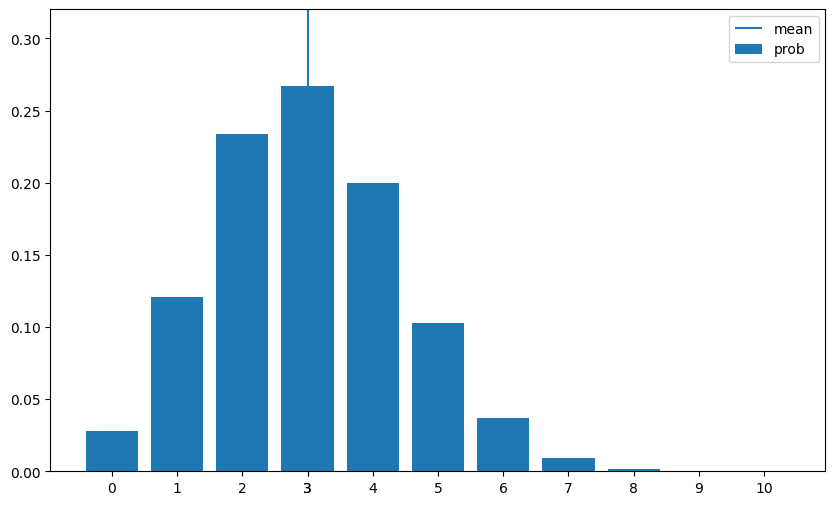

In [16]:
plot_prob(X)

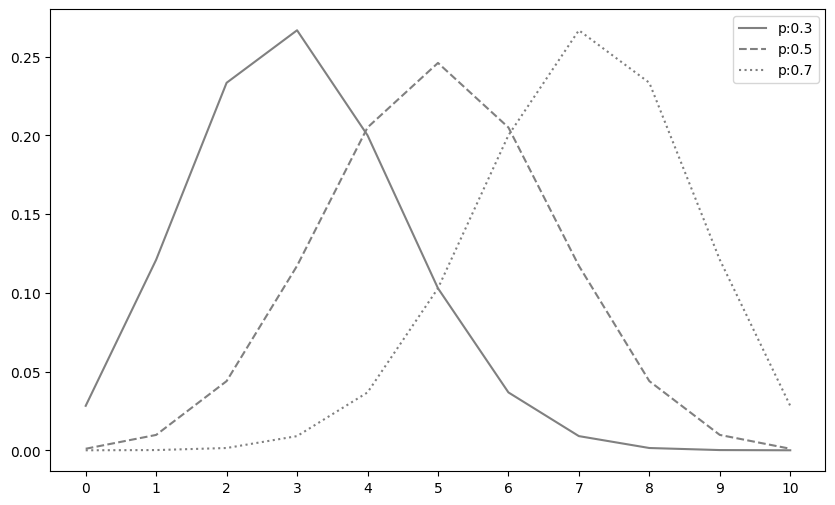

In [17]:
# matplotlib 라이브러리를 사용하여 그래픽을 생성하기 위한 준비를 합니다.
fig = plt.figure(figsize=(10, 6))  # 10x6 크기의 그림 영역을 생성합니다.
ax = fig.add_subplot(111)  # 1x1 그리드의 첫 번째 서브플롯을 추가합니다.

# 이항 분포의 가능한 모든 결과를 나타내는 x_set을 생성합니다.
# 여기서 n+1은 성공 횟수가 0부터 n까지 있을 수 있음을 의미합니다.
x_set = np.arange(n+1)

# 세 가지 다른 성공 확률(p=0.3, 0.5, 0.7)에 대해 그래프를 그립니다.
# linestyles 리스트에는 각 확률 분포를 구별하기 위한 선 스타일이 정의되어 있습니다.
for p, ls in zip([0.3, 0.5, 0.7], linestyles):
    # scipy.stats.binom 객체를 생성합니다. 이 객체는 n번의 시행과 p의 성공 확률을 가진
    # 이항 분포의 확률 변수를 나타냅니다.
    rv = stats.binom(n, p)
    
    # 이항 분포의 확률 질량 함수(pmf)를 계산하여 그래프에 선으로 표시합니다.
    # x_set에 대해 pmf 값을 계산하고, 이를 선으로 연결하여 그래프를 그립니다.
    ax.plot(x_set, rv.pmf(x_set),
            label=f'p:{p}', ls=ls, color='gray')  # p의 값과 선 스타일을 지정합니다.
    
    # x축의 눈금을 세팅합니다. 여기서는 모든 가능한 성공 횟수를 표시합니다.
    ax.set_xticks(x_set)
    
    # 범례를 추가하여 각 선이 어떤 성공 확률을 나타내는지 표시합니다.
    ax.legend()

# 생성한 그래프를 화면에 표시합니다.
plt.show()

## 6.3 기하분포

In [23]:
# 기하 분포를 반환하는 함수
def Ge(p):
    # 가능한 값의 집합을 정의합니다. 여기서는 1부터 29까지를 포함합니다.
    # 기하 분포의 범위는 무한하지만, 여기서는 계산을 위해 상한을 정합니다.
    x_set = np.arange(1, 30)

    # 확률 질량 함수(probability mass function, PMF)를 정의하는 내부 함수입니다.
    def f(x):
        # x 값이 가능한 값 집합 안에 있을 경우에만 계산합니다.
        if x in x_set:
            # 기하 분포의 확률 질량 함수를 계산합니다.
            # 첫 번째 성공이 일어나기까지 x-1번 실패할 확률입니다.
            return p * (1-p) ** (x-1)
        else:
            # x 값이 가능한 값 집합에 없다면 확률은 0입니다.
            return 0
    # 함수 f와 값의 집합 x_set을 튜플로 반환합니다.
    return x_set, f

In [24]:
# 성공 확률을 0.5로 설정
p = 0.5

# 기하 분포를 생성하는 함수 'Ge'에 성공 확률 p를 인자로 제공하여 호출
X = Ge(p)

In [25]:
check_prob(X)

expected value 2.0
variance 2.0


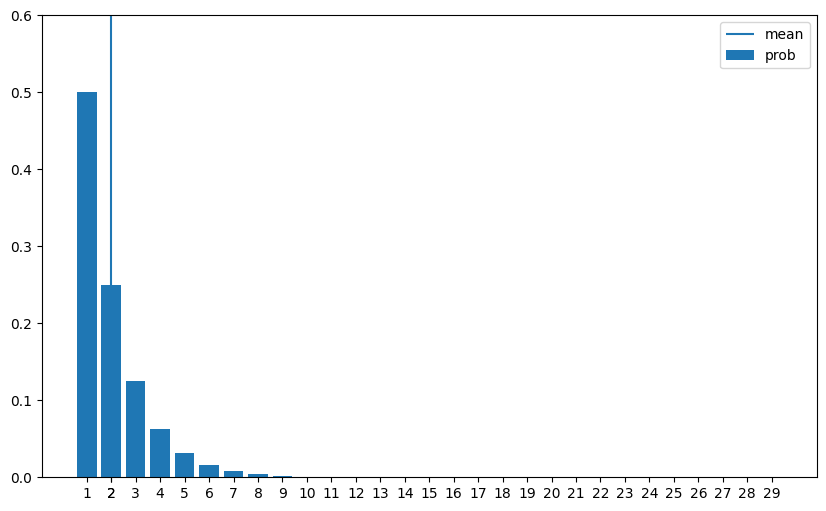

In [26]:
plot_prob(X)

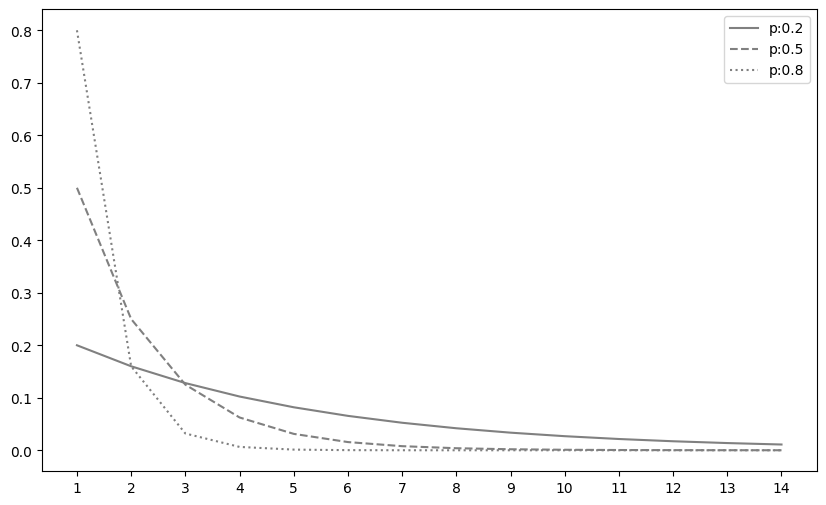

In [29]:
fig = plt.figure(figsize=(10, 6))  # 그래프의 크기를 10x6 인치로 설정
ax = fig.add_subplot(111)  # 서브플롯 추가

x_set = np.arange(1, 15)  # x_set는 1부터 14까지의 정수 배열

for p, ls in zip([0.2, 0.5, 0.8], linestyles):  # 성공 확률 p와 선 스타일 ls를 짝지어 반복
    rv = stats.geom(p)  # 성공 확률 p를 가지는 기하분포 객체 생성
    ax.plot(x_set, rv.pmf(x_set),  # x_set에 대해 확률질량함수 값을 계산하여 그래프로 그림
            label=f'p:{p}', ls=ls, color='gray')  # 라벨, 선 스타일, 색상 설정

ax.set_xticks(x_set)  # x축의 눈금 설정
ax.legend()  # 범례 표시
plt.show()  # 그래프 표시

## 6.4 포아송 분포

In [32]:
from scipy.special import factorial

def Poi(lam):
    # 확률변수 X의 값의 집합을 0부터 19까지로 설정합니다.
    # 포아송 분포는 무한대의 값들을 가질 수 있지만, 여기서는 0부터 19까지로 제한합니다.
    x_set = np.arange(20)
    
    # 확률질량함수를 정의합니다.
    # 포아송 분포의 PMF는 P(X=x) = (λ^x * e^(-λ)) / x! 로 주어집니다.
    def f(x):
        # x가 확률변수 X의 값의 집합 안에 있으면, 즉 0~19 범위 내에 있으면
        if x in x_set:
            # 포아송 분포의 확률질량함수 값을 반환합니다.
            return (lam ** x) / factorial(x) * np.exp(-lam)
        # x가 값의 집합 밖에 있으면 확률은 0입니다.
        else:
            return 0
    # 확률변수 X의 값의 집합과 확률질량함수를 반환합니다.
    return x_set, f

In [33]:
# 포아송 분포의 매개변수 λ를 3으로 설정합니다.
# λ는 단위 시간 또는 단위 면적당 평균 이벤트 발생 횟수를 나타냅니다.
lam = 3

# 확률변수 X를 위에서 정의한 포아송 분포로 생성합니다.
# 이를 통해 확률변수 X의 가능한 값의 집합과 각 값에 대한 확률질량함수를 얻습니다.
X = Poi(lam)

In [34]:
check_prob(X)

expected value 3.0
variance 3.0


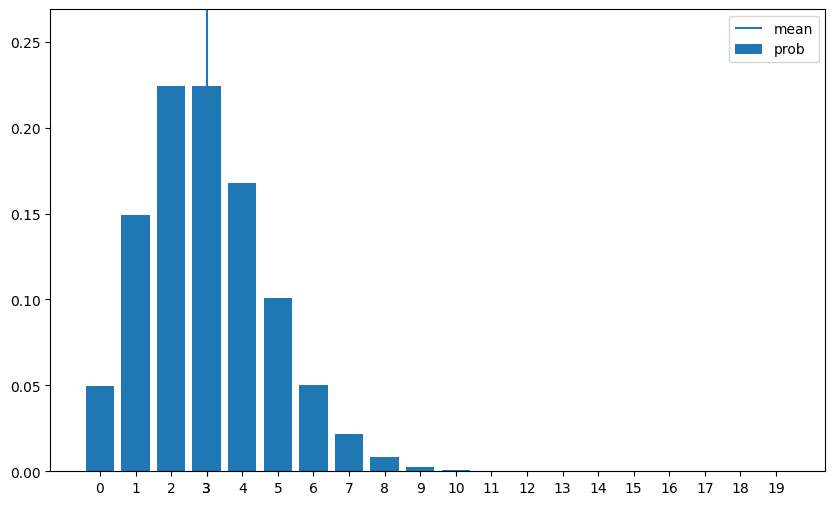

In [35]:
plot_prob(X)

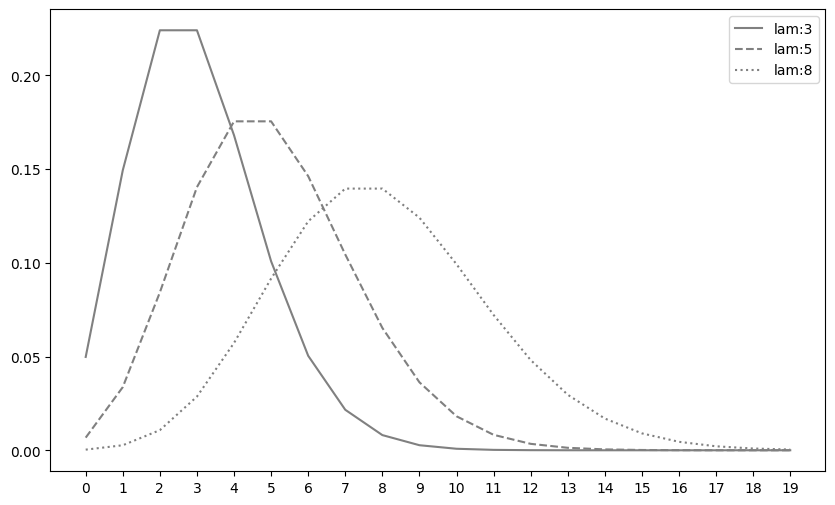

In [37]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

x_set = np.arange(20)
for lam, ls in zip([3, 5, 8], linestyles):
    rv = stats.poisson(lam)
    ax.plot(x_set, rv.pmf(x_set),
    label = f'lam:{lam}', ls=ls, color='gray')
ax.set_xticks(x_set)
ax.legend()
plt.show()